In [1]:
# import tensorflow as tf
# custom_objects={"GlorotUniform": tf.keras.initializers.glorot_uniform}

from tensorflow.keras.models import load_model
model = load_model('comedy_vgg_100_2_13_balanced-72.h5')


/home/smadar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/smadar/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/home/smadar/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Evaluate the NN model - Resnet
get y_pred and y_true

### model parameters:
1. 1 epoch
2. 100 batch size
3. 10 validation size
4. trainable layer false - 2 last ones
5. name - 'v4 the best'
6. weights-'imagenet'


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import pickle
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, classification_report, roc_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature


In [3]:
# dimensions of our images
img_width, img_height = 224, 224

# predicting images
WORKING_DIR = os.getcwd()
WORKING_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(WORKING_DIR))))
GENRE = 'Comedy'

genre_file = os.path.join(WORKING_DIR, "_Data/splits/" + GENRE + "/test/" + GENRE)
other_file = os.path.join(WORKING_DIR, "_Data/splits/" + GENRE + "/test/0_other")
other_files = [os.path.join(other_file, file) for file in os.listdir(other_file)]
genre_files = [os.path.join(genre_file, file) for file in os.listdir(genre_file)]

all_files = other_files + genre_files
y_pred = []

images = np.empty((1, img_width, img_height, 3))
for file in tqdm(all_files):    
    img = image.load_img(file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#     print(x.shape)

#     print(model.predict(x, batch_size=1))
    y_pred.append(model.predict(x, batch_size=1)[0][1])
#     print(y_pred)    

print(y_pred)




[4.2216357e-32, 1.0, 0.0, 0.9999999, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.664393e-30, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.9999988, 1.0, 1.0, 1.0, 1.0, 1.0, 7.64117e-07, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.8089786e-09, 5.666521e-26, 0.0, 1.0, 0.0, 1.0, 3.253959e-19, 3.143959e-34, 0.0030287073, 1.0, 0.0727411, 1.0, 0.0, 1.1955148e-31, 0.0, 9.8798525e-21, 1.0, 1.0, 1.0, 1.0, 1.0, 5.3370492e-34, 8.218152e-09, 1.5220552e-33, 1.0, 1.0, 7.090643e-27, 0.10934791, 0.13197015, 1.0, 1.0, 1.0, 0.0, 0.0004186689, 1.0688342e-07, 1.0, 1.0, 2.0870919e-14, 4.3842814e-05, 2.4498146e-07, 1.0, 1.0, 3.8495007e-09, 1.0, 1.0, 1.0, 1.0272384e-31, 1.0, 1.12713344e-07, 3.7128296e-15, 1.0, 6.59958e-09, 9.776912e-26, 1.0, 2.825321e-26, 1.0, 1.0, 1.0, 1.465931e-18, 0.33878708, 1.0, 1.0, 0.0, 1.0, 9.876896e-17, 1.0, 0.0, 1.0, 1.0, 2.891829e-16, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.9999573, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,

save the y_pred as pickle (because it takes time)
* **important note:** comedy is 1 and other is 0!

In [4]:
with open('comedy_vgg_100_2_13_balanced-72.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(y_pred, f, pickle.HIGHEST_PROTOCOL)


In [5]:
y_true = [0] * len(other_files) + [1] * len(genre_files)
# y_true

In [6]:
len(y_pred)

6631

In [7]:
len(y_true)

6631

# Precision recall

In [6]:
file = open("y_comedy_resnet_6-4-1-66.pickle",'rb')
y_pred_proba = pickle.load(file)
file.close()
# print(y_pred_proba)

In [24]:
# y_pred_proba

(0.0, 1.0)

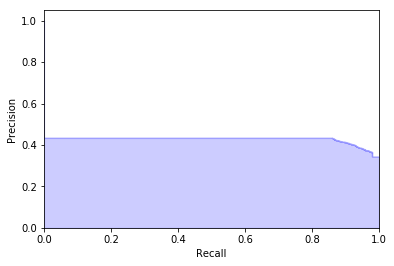

In [8]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


In [9]:
for th, rec in zip(_, recall):
    print(th)
    print(rec)

print(th_min)

0.0
1.0
1.3985414e-38
0.980625275209159
1.6397953e-38
0.980625275209159
1.7724329e-38
0.980625275209159
1.990718e-38
0.980625275209159
2.0496211e-38
0.980625275209159
2.2370976e-38
0.980625275209159
3.256995e-38
0.980625275209159
3.5838018e-38
0.980625275209159
3.6229215e-38
0.980625275209159
3.7462336e-38
0.980625275209159
3.981795e-38
0.980625275209159
4.0604526e-38
0.980625275209159
4.789897e-38
0.980625275209159
5.4270434e-38
0.980625275209159
5.508513e-38
0.980625275209159
5.7935216e-38
0.980625275209159
6.0044406e-38
0.980625275209159
6.131001e-38
0.980625275209159
6.243916e-38
0.980625275209159
6.519151e-38
0.980625275209159
7.0820885e-38
0.980625275209159
7.7311183e-38
0.980625275209159
8.448131e-38
0.980625275209159
9.0794393e-38
0.980625275209159
9.840462e-38
0.980625275209159
1.1094527e-37
0.980625275209159
1.2777227e-37
0.980625275209159
1.6649522e-37
0.9801849405548216
1.9948315e-37
0.9801849405548216
2.2038194e-37
0.9801849405548216
2.3815881e-37
0.9797446059004844
2.5328

NameError: name 'th_min' is not defined

# ROC curve

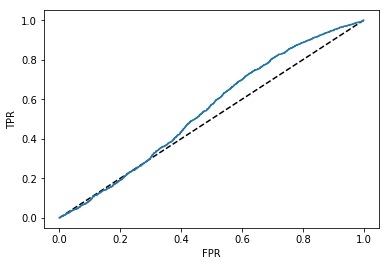

In [69]:
fpr, tpr, th = roc_curve(y_true, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC comedy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Decide on Threshold

In [10]:
THRESHOLD = 0.9999999


labels_pred = [ 1 if x > THRESHOLD else 0 for x in y_pred ]
# print(labels_pred)


# Precision

In [59]:
presicion = precision_score(y_true, labels_pred)
print('the precision for the NN binary model is {}'.format(presicion))

the precision for the NN binary model is 0.3716030534351145


# Recall

In [60]:
recall = recall_score(y_true,labels_pred)
print('the recall for the NN binary model is {}'.format(recall))

the recall for the NN binary model is 0.5358872743284897


# F1 Score


In [61]:
f1_score(y_true,labels_pred)

0.43887486476739995

# Classification report

In [11]:
print(classification_report(y_true, labels_pred))

              precision    recall  f1-score   support

           0       0.85      0.41      0.56      4360
           1       0.43      0.86      0.58      2271

   micro avg       0.57      0.57      0.57      6631
   macro avg       0.64      0.64      0.57      6631
weighted avg       0.71      0.57      0.56      6631



classification report for Baseline:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      7613
           1       0.57      0.14      0.22      3704

   micro avg       0.68      0.68      0.68     11317
   macro avg       0.63      0.54      0.51     11317
weighted avg       0.65      0.68      0.61     11317